In [ ]:
# Dataset consists of 13 variables (12 features) used to predict house price


In [30]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
# Load data
df = pd.read_csv("Housing.csv")

In [3]:
# View first few rows of data
df.head()

# Price is what we want to predict ultimately

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# print the shape of dataset
print(df.shape)

# Data has 545 observations with 13 columns/variables

(545, 13)


In [5]:
# Check the contents of data
df.info()

# 6 numeric and 7 character type variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Check for missing values
print(df.isnull().sum())

# No missing values in data

# Check for any duplicates
dups = df.duplicated().sum()
print(f"\nData has {dups} duplicates")

# Data has 0 duplicate values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data has 0 duplicates


In [7]:
# Set display option 
pd.set_option('display.float_format', '{:.2f}'.format) 

# Let's view summary statistics for numerical variables
df.describe().round()

# Price: Avg price is $4,766,729 with prices ranging from $1,750,000
# to $ 13,300,000

# Area: The total area of the house in square feet.
# Avg area is 5,151 sq ft with area ranging from 1,650 to 16,200 sqft

# Bedrooms: Avg number of bedrooms is 3 with bedrooms ranging from 1 to 6
# Bathrooms: Avg number of bathrooms is 1 with bathrooms ranging from 1 to 4
# Stories: Avg number of stories in house is 2 and ranging from 1 to 4 stories
# Parking: Avg number of parking spaces is 1 and spaces range from 0 to 3


,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.00,5151.00,3.00,1.00,2.00,1.00
std,1870440.00,2170.00,1.00,1.00,1.00,1.00
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [8]:
# Let's look at the counts for categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

# Mainroad: Whether the house is connected to the main road
# 468 (85.9%) are connected to mainroad while 77 are not

# Guestroom: 448 out of 545 houses (82.2%) have a guest room

# Basement: 

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


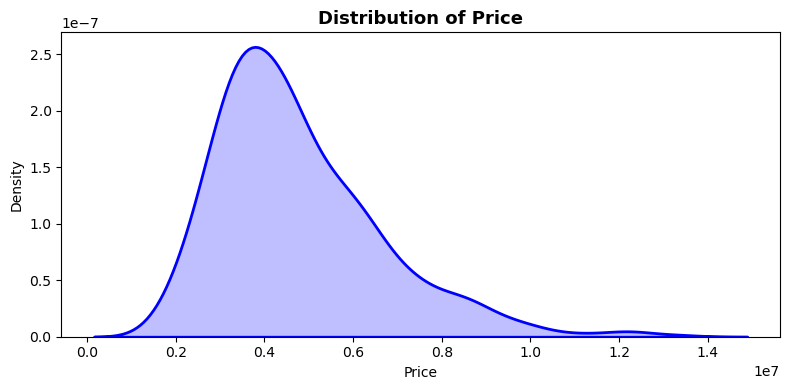

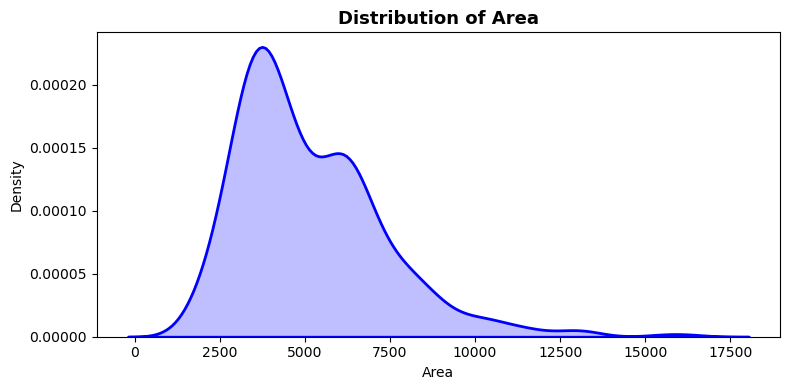

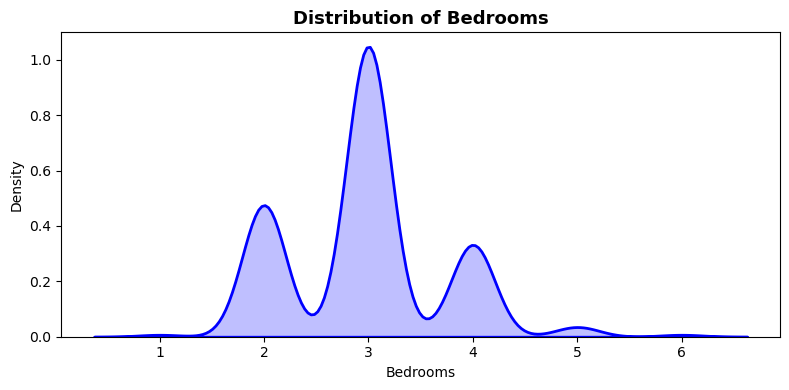

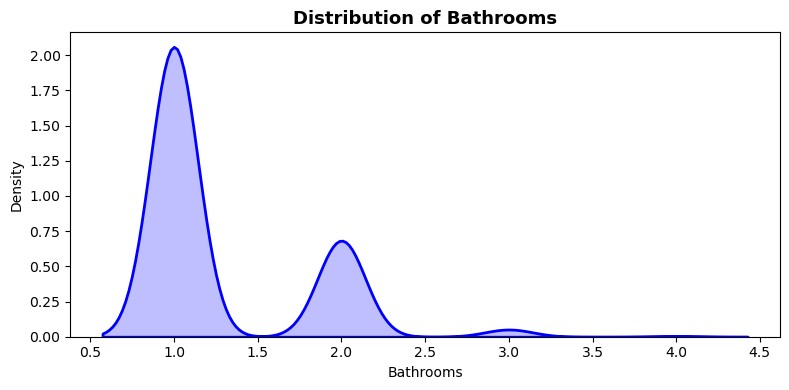

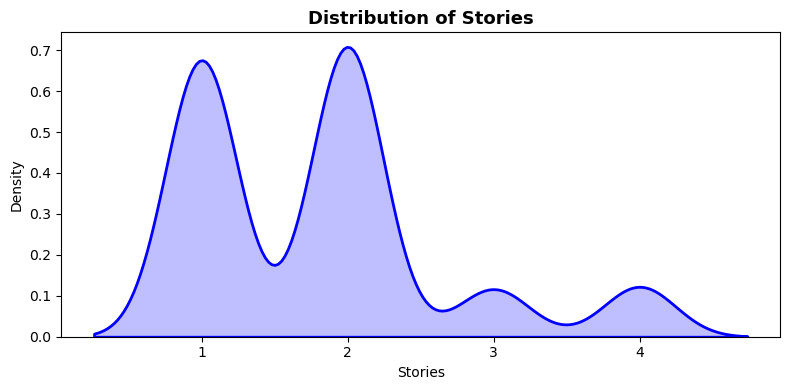

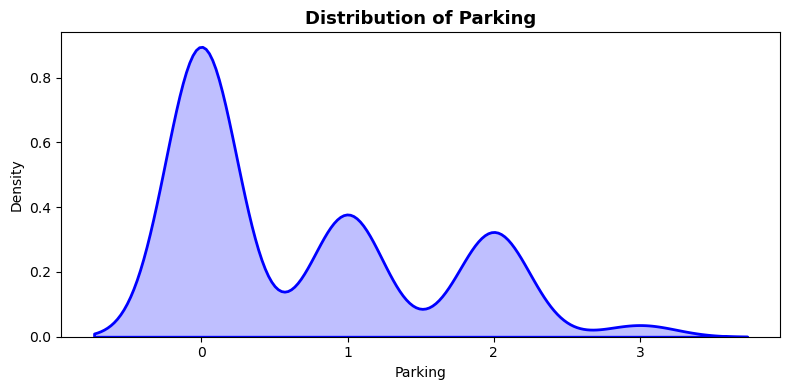

In [44]:
# Let's perform Univariate Analysis of numeric and character variables
nums_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Look at Histograms/Distribution of Numeric Variables
for col in nums_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True, linewidth=2, color='blue')
    plt.title(f"Distribution of {col.capitalize()}", fontsize=13, fontweight='bold')
    plt.xlabel(col.capitalize())
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# Distribution of Price is skewed heavily to the right (Positively skewed)
# Distribution of Area is also positively skewed

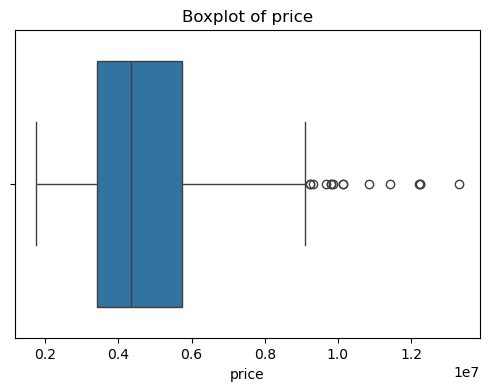

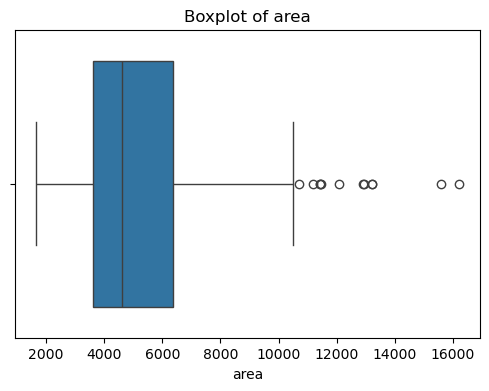

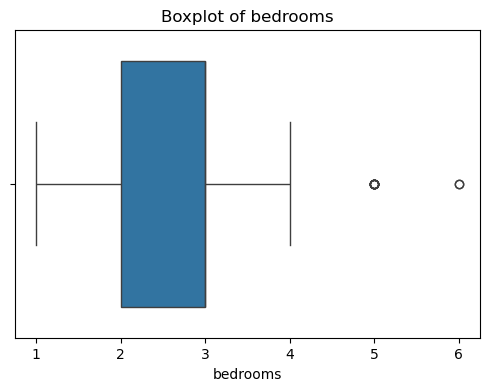

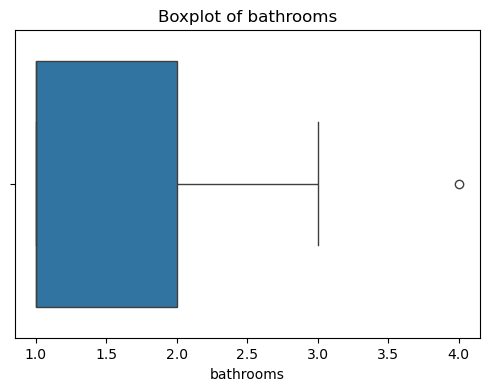

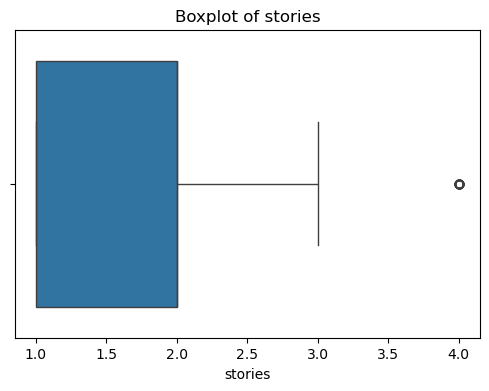

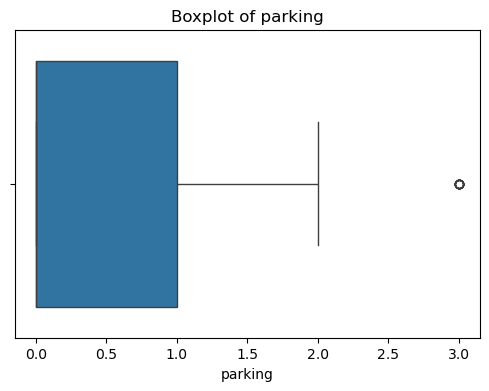

In [10]:
# Let's look at the boxplots for the numeric variables to see if there
# are any possible outliers
for col in nums_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# All the variables have outliers

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


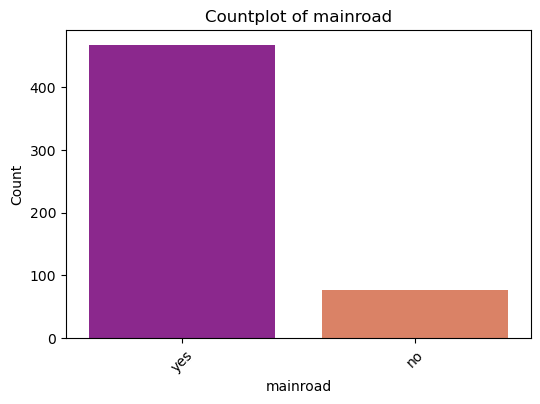

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


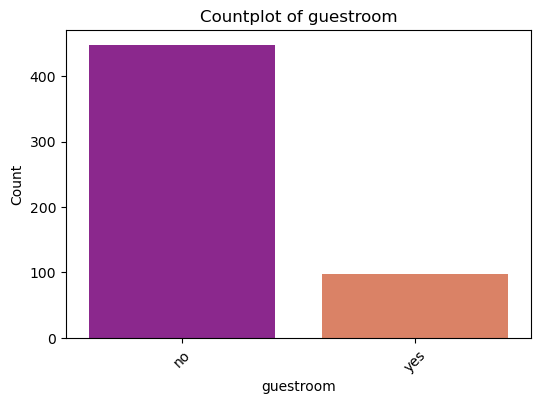

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


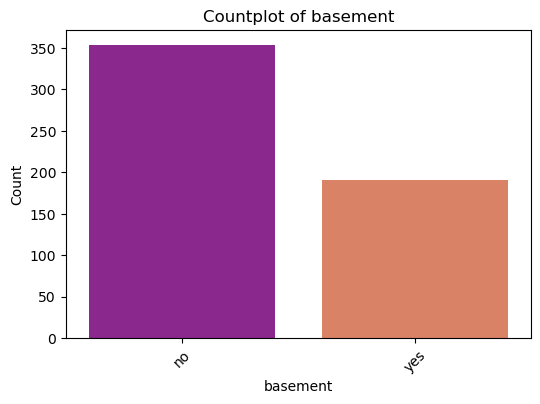

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


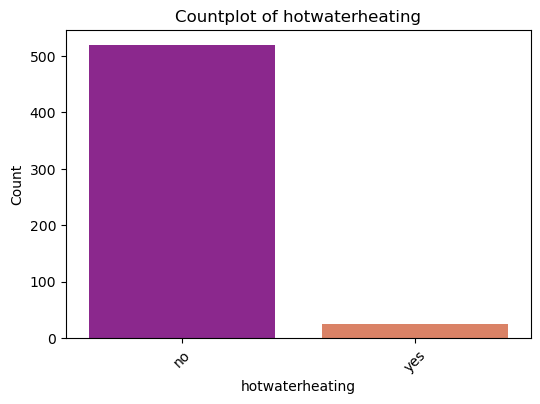

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


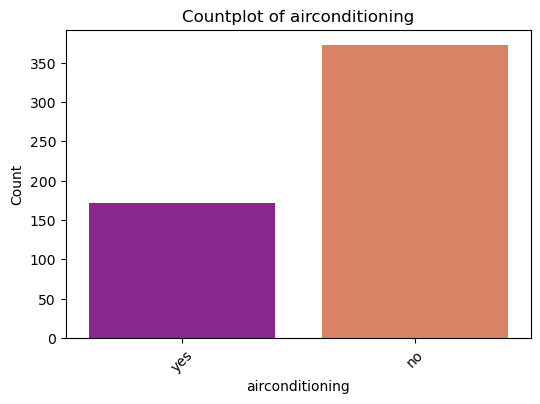

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


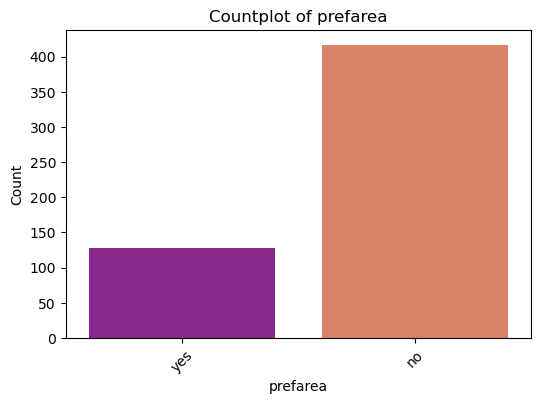

C:\Users\shirl\AppData\Local\Temp\ipykernel_8408\3599675878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="plasma")


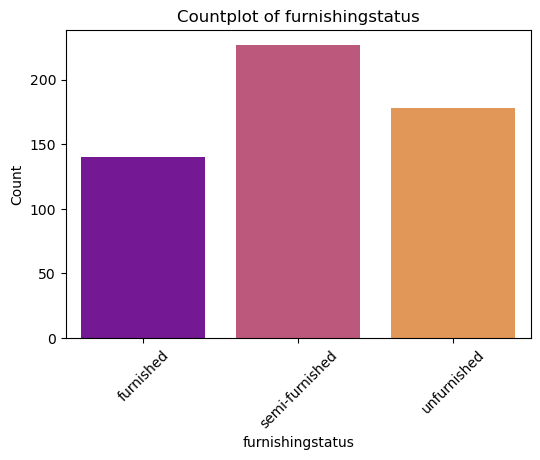

In [ ]:
# Let's view barplots of categorical variables

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="plasma")
    plt.title(f"Countplot of {col}")
    plt.ylabel("Count")
    plt.xlabel(f"{col}")
    plt.xticks(rotation=45)
    plt.show()

# From the barplots we see that:
# Most houses have a mainroad, no guestroom, no basement, no hot water heater,
# no air conditioning and no prefarea

# Most houses are semi-furnished followed by not-furnished and then,
# completely furnished

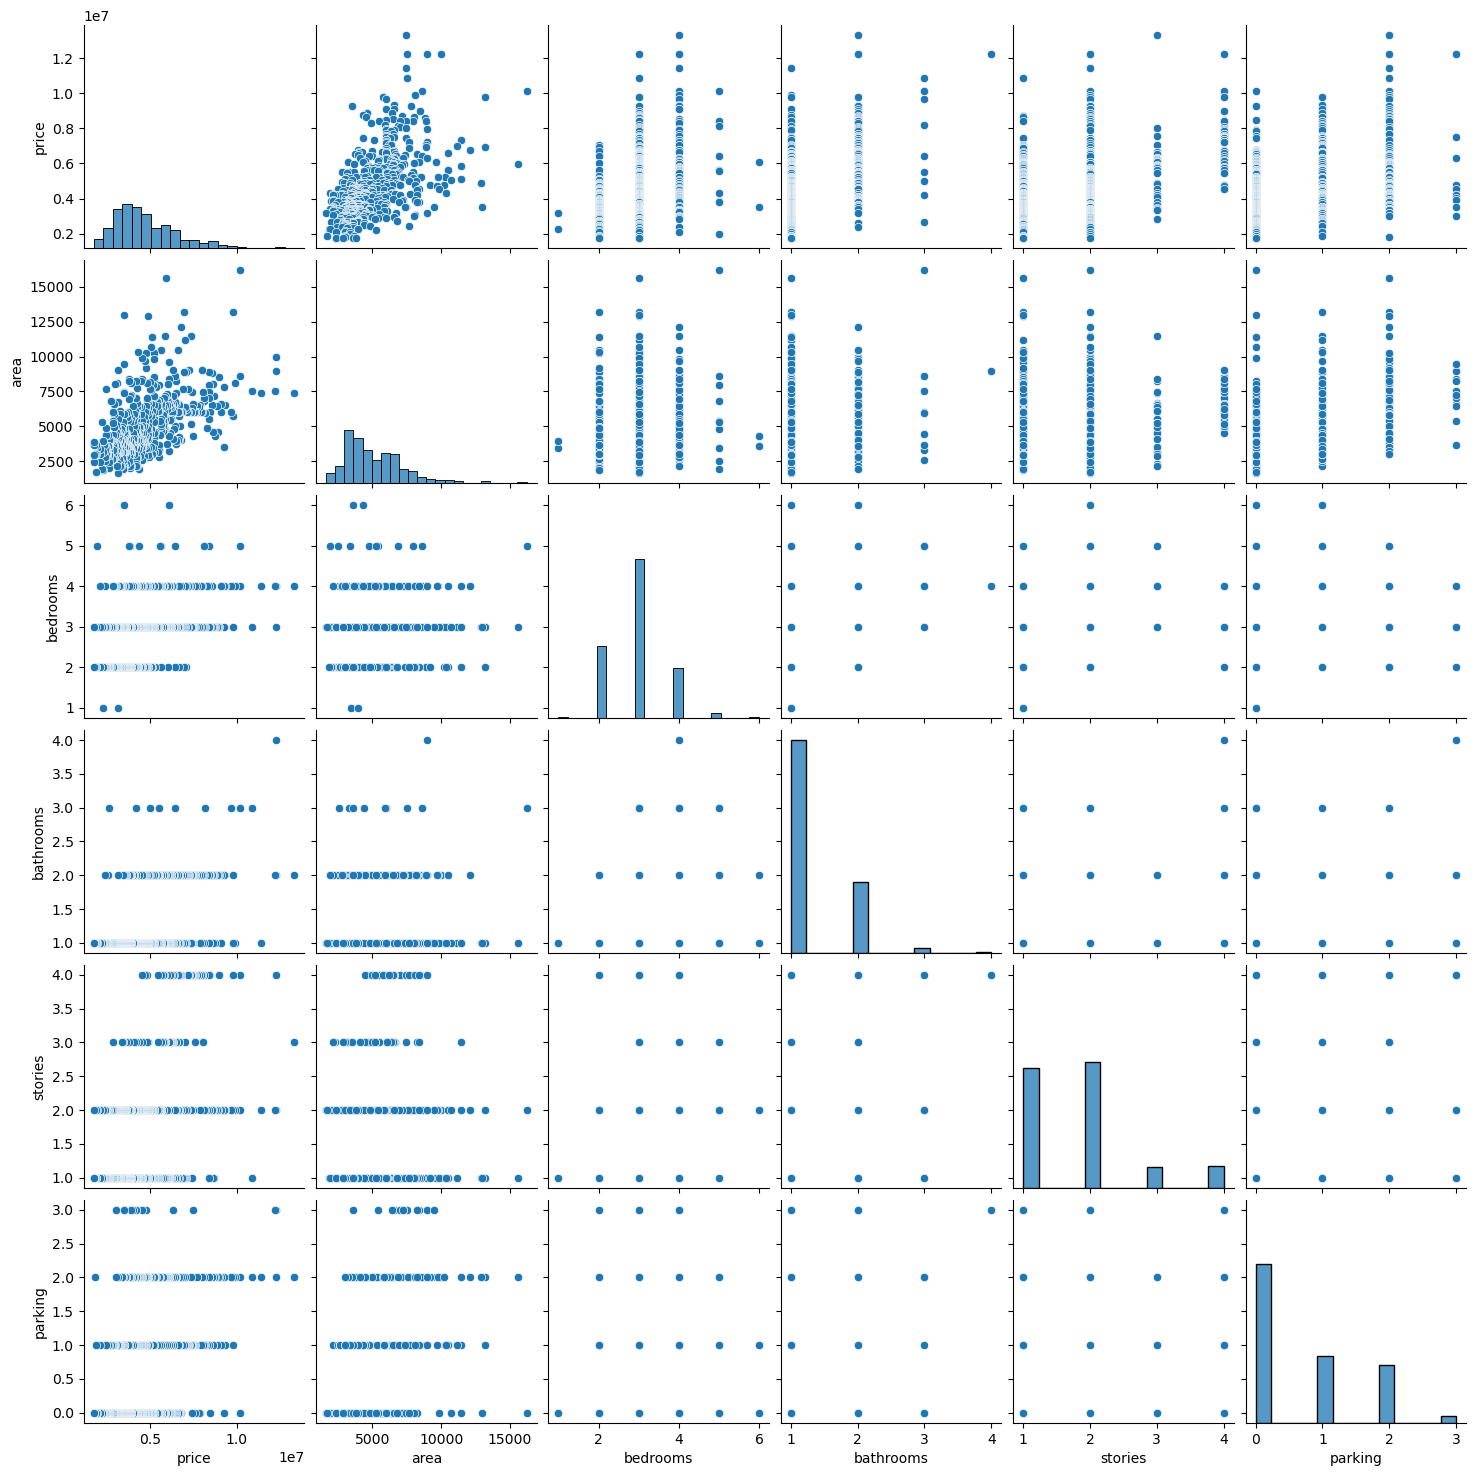

In [12]:
# Let's see if there are correlation among numerical variables
sns.pairplot(df[nums_cols])
plt.show()

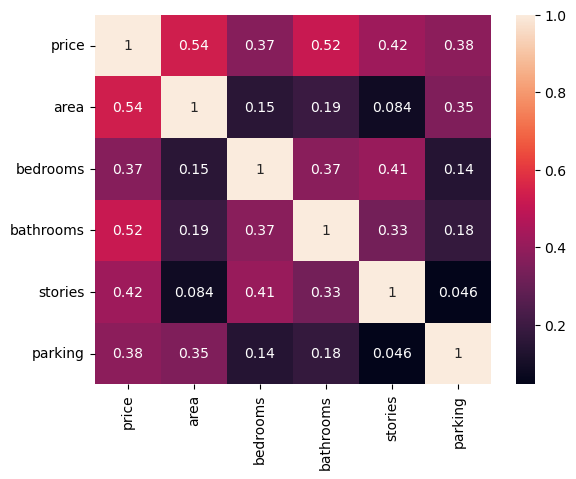

In [ ]:
# Also use a heatmap
corr = df[nums_cols].corr()
sns.heatmap(corr, annot=True, cmap='rocket')
plt.show()

# From heatmap we see that area is correlated with price (0.54),
# followed by bathrooms being correlated with price (0.52)

# These a moderately positive correlations and suggest that area and
# bathrooms tend to influence the price of houses.

In [ ]:
# Let's Use Random Forest Regression to Predict House Prices

In [49]:
# Create a copy of original dataframe to use for modeling
df_model = df.copy()

In [ ]:
# Let's first encode the object variables to numerical variables
# Use one hot encoding (since object features have no order)
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'prefarea', 'furnishingstatus']
df_model = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [53]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [54]:
np.random.seed(42)

# Choose predictors and target
X = df_model.drop("price", axis=1, inplace=False)
y = df_model['price']
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Shape:", X.shape, y.shape)

Shape: (545, 13) (545,)


In [55]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Training has 436 and Testing has 109


Training samples: 436, Testing samples: 109


In [ ]:
# Tree based model so scaling is not required


In [56]:
# Fit Random Forest Model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
# Let's create Dataframe of Test Set to view predictions vs actual
test_df = X_test.copy()
test_df['Actual House Price'] = y_test
test_df['Predicted House Price'] = y_pred

# This corrects display of dataframe columns (For assurance)
pd.set_option('display.max_columns', None)      # show all columns
pd.set_option('display.width', None)            # don't wrap long lines
pd.set_option('display.max_colwidth', None)     # show full content in each cell
pd.set_option('display.expand_frame_repr', False) 

print("Testing Data with Predictions:")
test_df.head()

Testing Data with Predictions:


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Actual House Price,Predicted House Price
316,5900,4,2,2,1,False,False,True,False,False,False,False,True,4060000,5377680.00
77,6500,3,2,3,0,True,False,False,False,True,True,False,False,6650000,7287070.00
360,4040,2,1,1,0,True,False,False,False,False,False,True,False,3710000,3747528.75
90,5000,3,1,2,0,True,False,False,False,True,False,True,False,6440000,4502120.00
493,3960,3,1,1,0,True,False,False,False,False,False,False,False,2800000,3748885.00


In [ ]:
# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nRegression MSE: {mse ** 0.5:.2f}, R2: {r2:.2f}")

# R2 of 0.61 suggesting that the features explain 61% of the 
# total variance/variation of House Price

# Mean squared error says that the predictions vs reality
# of house prices are off about 1,400,565.97 dollars


Regression MSE: 1400565.97, R2: 0.61


In [62]:
# Let's to see which features are the most important
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance")
print(feat_importance)

# We see that area is the overwhelming contributor to the price of Houses at 0.47
# followed by bathrooms at 0.15
# Majority of the features have very low importance suggesting that
# they may not contribute to the house price


Feature Importance
                            Feature  Importance
0                              area        0.47
2                         bathrooms        0.15
9               airconditioning_yes        0.06
4                           parking        0.06
3                           stories        0.06
1                          bedrooms        0.05
12     furnishingstatus_unfurnished        0.04
7                      basement_yes        0.03
10                     prefarea_yes        0.03
8               hotwaterheating_yes        0.02
6                     guestroom_yes        0.02
11  furnishingstatus_semi-furnished        0.01
5                      mainroad_yes        0.01


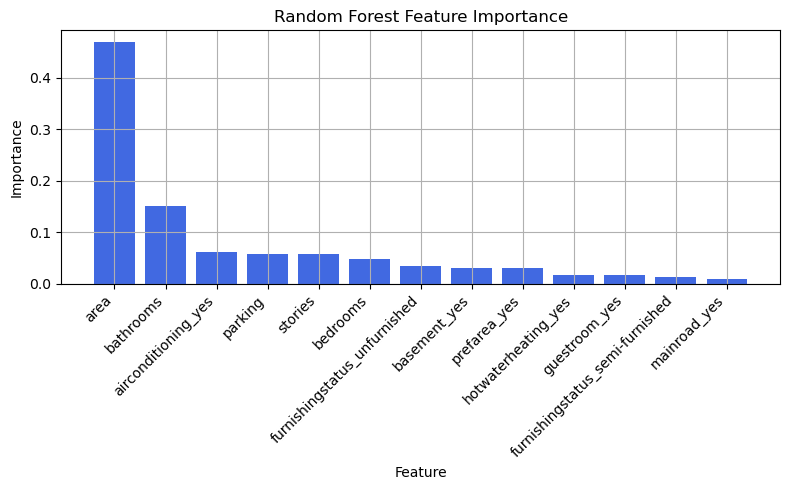

In [63]:
# Visualize Feauture Importance
plt.figure(figsize=(8,5))
plt.bar(feat_importance['Feature'], feat_importance['Importance'], color="royalblue")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()                   
plt.show()

# We can visual see how the importance of each feature is for predicting 
# house prices using random forest regression